## Problem Statement

### Imagine you have a dataset where you need to predict the Genres of Music using an Unsupervised algorithm and you need to find the accuracy of the model, built-in docker, and use some library to display that in frontend

In [41]:
#import neccesory library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
#import dataset
df = pd.read_csv('../dataset/data_music.csv')

In [6]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [8]:
df.shape

(1000, 30)

- Dataset have 1000 rows and 30 columns

In [7]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

- Datatypes are correct

In [10]:
#checking duplicate rows
df.duplicated().sum()

0

- No duplicate values in data

In [12]:
#checking missing values
df.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

- No missing values in data

In [19]:
#checking target class data 
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

- label class is balanced

<AxesSubplot:>

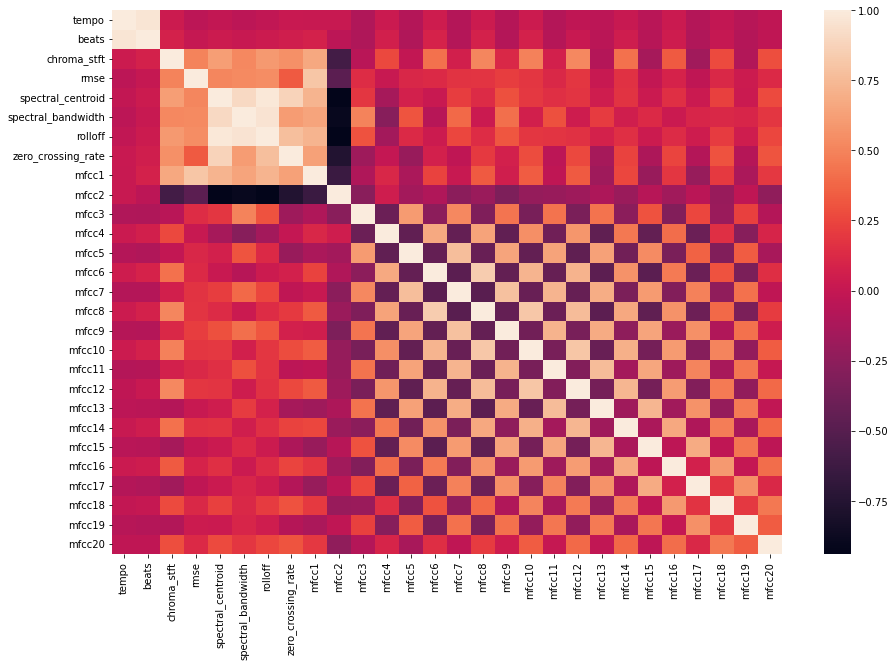

In [18]:
#checking correlation.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [21]:
#Since we are using unsupervised algorithm,target column is not required

In [22]:
# Prepare the data
X = df.drop('label', axis=1)

In [23]:
# Feature scaling
numeric_cols = X.select_dtypes(include=['float', 'int']).columns
X_scaled = StandardScaler().fit_transform(X[numeric_cols])

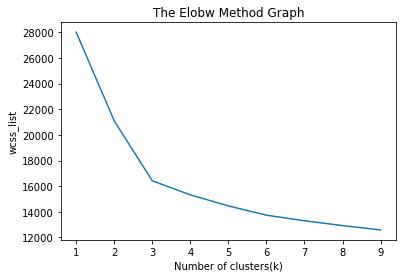

In [26]:
#Finding the optimal number of clusters using the elbow method.

#Initializing the list for the values of WCSS 
wcss_list= []   
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 40)  
    kmeans.fit(X_scaled)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 10), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [27]:
kmeans.inertia_

12587.706008937306

In [29]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=10)

In [30]:
clusters = kmeans.fit_predict(X_scaled)

In [31]:
clusters[0:5]

array([0, 1, 1, 1, 0])

In [33]:
# Evaluate the clustering
silhouette_avg = silhouette_score(X_scaled, clusters)

In [34]:
silhouette_avg 

0.2722168626705329

- Generally, a silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters and better separation between clusters.

- A silhouette score of 0.272 is considered to be fair to moderate

In [36]:
# Get the cluster labels
cluster_labels = kmeans.labels_

In [37]:
# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

In [38]:
df.head(1)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,cluster
0,blues.00081.au,103.359375,50,0.38026,0.248262,2116.942959,1956.611056,4196.10796,0.127272,-26.929785,...,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues,0


In [39]:
df['cluster'].value_counts()

0    373
2    318
1    309
Name: cluster, dtype: int64

In [42]:
print(confusion_matrix(df['cluster'],kmeans.labels_))

[[373   0   0]
 [  0 309   0]
 [  0   0 318]]


In [43]:
print(classification_report(df['cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       309
           2       1.00      1.00      1.00       318

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
# Create Flask app
app = Flask(__name__)

# Define API endpoint for predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Get the data from the request
    # Perform necessary preprocessing on data, if required
    
    # Scale the data
    data_scaled = StandardScaler().fit_transform(data[numeric_cols])
    
    # Predict clusters for the data
    predicted_clusters = kmeans.predict(data_scaled)
    
    # Prepare the response
    response = {'predicted_clusters': predicted_clusters.tolist()}
    return jsonify(response)

# Define API endpoint for accuracy
@app.route('/accuracy', methods=['GET'])
def accuracy():
    response = {'silhouette_avg': silhouette_avg}
    return jsonify(response)

if __name__ == '__main__':
    # Run the Flask app
    app.run(debug=True)

